### DBSCAN con dataset de clientes sobre gastos en productos

El dataset Wholesale Customers contiene información sobre el gasto anual de distintos clientes en varias categorías de productos.

Sólo vamos a trabajar con las variables Fresh y Milk.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.neighbors import NearestNeighbors

In [3]:
customers = pd.read_csv("Wholesale-customers-data.csv")

customers = customers[["Fresh", "Milk"]]
customers.head()


,Fresh,Milk
0,12669,9656
1,7057,9810
2,6353,8808
3,13265,1196
4,22615,5410


Estandariza las variables Fresh y Milk utilizando StandardScaler

In [ ]:
#Estandariza las variables Fresh y Milk utilizando StandardScaler
scaler = StandardScaler()
customers_scaled = scaler.fit_transform(customers)

customers_scaled[:5]

array([[ 0.05293319,  0.52356777],
       [-0.39130197,  0.54445767],
       [-0.44702926,  0.40853771],
       [ 0.10011141, -0.62401993],
       [ 0.84023948, -0.05239645]])

Representa los datos en una gráfica:

- Eje x = valores de la variable Fresh
- Eje y = valores de la variable Milk

C:\Users\alere\AppData\Local\Temp\ipykernel_5608\1386996034.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(customers_scaled[:, 0], customers_scaled[:, 1], s=50, cmap='viridis')


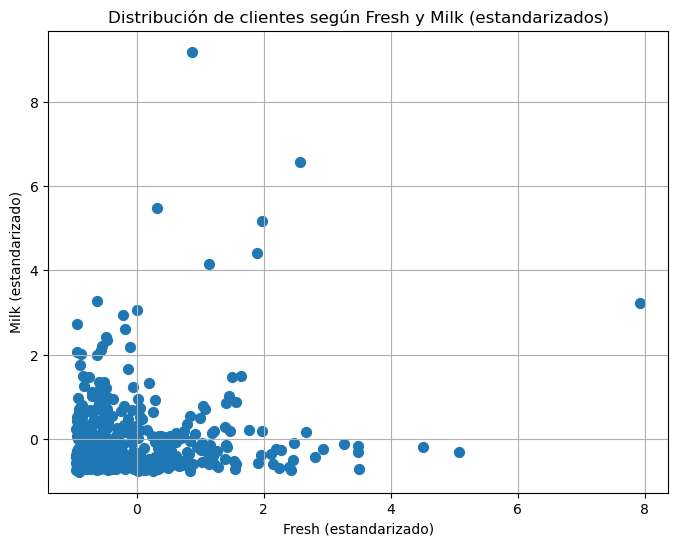

In [10]:
#Representa los datos en una gráfica:

#- Eje x = valores de la variable Fresh
#- Eje y = valores de la variable Milk
plt.figure(figsize=(8,6))
plt.scatter(customers_scaled[:, 0], customers_scaled[:, 1], s=50, cmap='viridis')
plt.title("Distribución de clientes según Fresh y Milk (estandarizados)")
plt.xlabel("Fresh (estandarizado)")
plt.ylabel("Milk (estandarizado)")
plt.grid()
plt.show()

Representa el gráfico de distancia k (k-distance graph). Para ello, Calcula la distancia al 5º vecino más cercano para cada observación del conjunto de datos escalado y representa gráficamente dichas distancias ordenadas de menor a mayor.

Se utiliza NearestNeighbors para calcular las distancias al 5º vecino más cercano.
Completa el código y dibuja la gráfica de distancia k.
- ¿Cuál es el mejor valor de epsilon?
- Dibuja una línea horizontal en el mejor valor de epsilon.

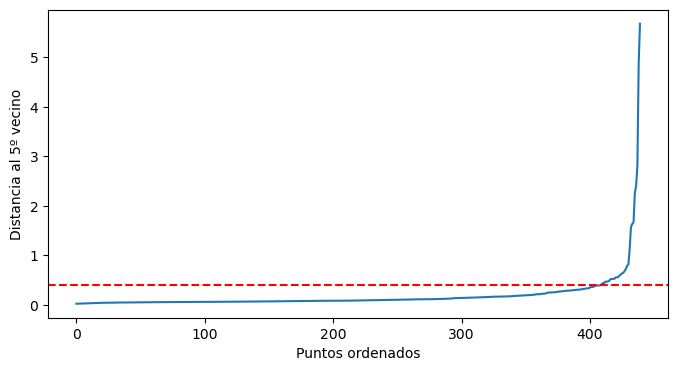

In [13]:
k = 5
nn = NearestNeighbors(n_neighbors=k)
nn_fit = nn.fit(customers_scaled)
distances, _ = nn_fit.kneighbors(customers_scaled)

k_distances = np.sort(distances[:, k-1]) # ordena las distancias

plt.figure(figsize=(8, 4))
plt.plot(k_distances)
plt.axhline(y=0.4, color="red", linestyle="--")
plt.xlabel("Puntos ordenados")
plt.ylabel("Distancia al 5º vecino")
plt.show()


Aplica el algoritmo DBSCAN sobre el conjunto de datos escalado utilizando el valor obtenido de epsilon y MinPts = 5. 

Obtén las etiquetas de clúster asignadas a cada observación.

¿Cuántos outliers hay? Obtén el valor

In [17]:
#Aplica el algoritmo DBSCAN sobre el conjunto de datos escalado utilizando el valor obtenido de epsilon y MinPts = 5..

#Obtén las etiquetas de clúster asignadas a cada observación.

#¿Cuántos outliers hay? Obtén el valor
dbscan = DBSCAN(eps=0.4, min_samples=5)
clustering_labels = dbscan.fit_predict(customers_scaled)
print("Etiquetas de los clusters:")
print(clustering_labels)
n_outliers = np.sum(clustering_labels == -1)
print("Número de outliers detectados:")
print(n_outliers)


Etiquetas de los clusters:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0 -1  0  0  0
  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0 -1 -1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0

Representa el conjunto de datos escalado, coloreando los puntos según las etiquetas de clúster obtenidas con DBSCAN.

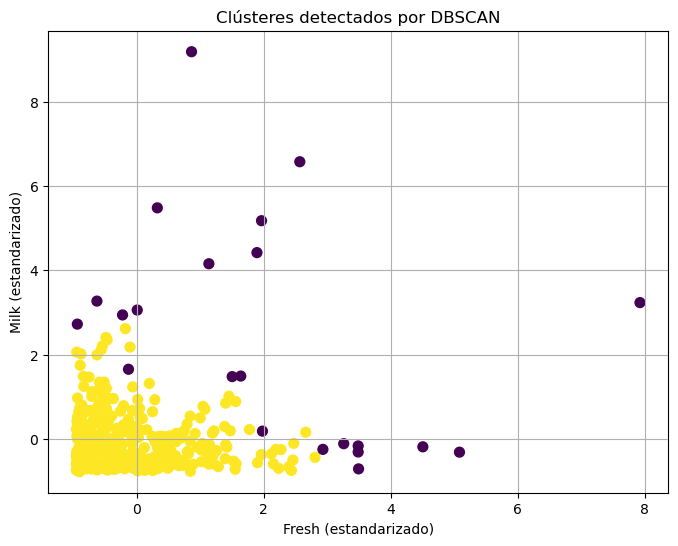

In [16]:
#Representa el conjunto de datos escalado, coloreando los puntos según las etiquetas de clúster obtenidas con DBSCAN.
plt.figure(figsize=(8,6))
plt.scatter(customers_scaled[:, 0], customers_scaled[:, 1], c=clustering_labels, s=50, cmap='viridis')
plt.title("Clústeres detectados por DBSCAN")
plt.xlabel("Fresh (estandarizado)")
plt.ylabel("Milk (estandarizado)")
plt.grid()
plt.show()

### K-Means

Aplica el algoritmo K-Means sobre el conjunto de datos escalado. Prueba con un número de clusters = 2 e = 4. 

Representa también los resultados en una gráfica.

Compara los resultados obtenidos con DBSCAN.